In [4]:
import pandas as pd
import numpy as np

# Importing and loading the processed data

data_path = '../data/processed/Cleaned_Data.csv'
data = pd.read_csv(data_path)

# Removing the columns that are not needed for the model
data = data.drop(columns=['GroceriesIndex', 'RestaurantPriceIndex', 'SalaryUSD', 'SalaryRoundedUSD'])

data

,Country,JobTitle,Category,CostofLivingIndex,RentIndex,CostofLivingPlusRentIndex,LocalPurchasingPowerIndex,SalaryRangeinK
0,Afghanistan,Cardiovascular Specialist,Health and Medical,22.8,2.8,13.3,22.4,50-60
1,Afghanistan,Chief of Surgery,Health and Medical,22.8,2.8,13.3,22.4,60-70
2,Afghanistan,Invasive Cardiologist,Health and Medical,22.8,2.8,13.3,22.4,50-60
3,Afghanistan,Physician - Cardiology,Health and Medical,22.8,2.8,13.3,22.4,50-60
4,Afghanistan,Surgeon - Cardiothoracic,Health and Medical,22.8,2.8,13.3,22.4,50-60
...,...,...,...,...,...,...,...,...
88480,Venezuela,Telecommunication Service Delivery Manager,Telecommunication,39.4,5.7,23.4,12.6,50-60
88481,Venezuela,Telecommunication Solution Architect,Telecommunication,39.4,5.7,23.4,12.6,50-60
88482,Venezuela,Telecommunications Analyst,Telecommunication,39.4,5.7,23.4,12.6,50-60
88483,Venezuela,Telecommunications Assistant Manager,Telecommunication,39.4,5.7,23.4,12.6,50-60


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Splitting the data into features and target
X = data.drop('SalaryRangeinK', axis=1)
y = data['SalaryRangeinK']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining numeriacal and categorical columns
num_cols = ['CostofLivingIndex', 'RentIndex', 'CostofLivingPlusRentIndex', 'LocalPurchasingPowerIndex']
cat_cols = ['Country', 'JobTitle', 'Category']
# Defining the numerical and categorical transformers
numerical_transformer = Pipeline([('imputer', KNNImputer(n_neighbors=7, weights='distance')), ('scaler', RobustScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='first'))])
# Building the preprocessor
preprocessor = ColumnTransformer(transformers=[('num_transforms', numerical_transformer, num_cols), ('cat_transforms', categorical_transformer, cat_cols)])
# Displaying the preprocessor
preprocessor


ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['CostofLivingIndex', 'RentIndex',
                                  'CostofLivingPlusRentIndex',
                                  'LocalPurchasingPowerIndex']),
                                ('cat_transforms',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'))]),
                                 ['Country', 'JobTitle', 'Category'])])

In [6]:
# Creating the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['CostofLivingIndex',
                                                   'RentIndex',
                                                   'CostofLivingPlusRentIndex',
                                                   'LocalPurchasingPowerIndex']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['Country', 'JobTitle',
                                                   'Category'])])),
                ('model', RandomForestClassifier())])

In [7]:
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, balanced_accuracy_score, log_loss
# Defining the scoring metrics
scoring = {
    'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True), 
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Cross validating the model
cv_results = cross_validate(model_pipeline, X_train, y_train, scoring=scoring, cv=5)

/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/py

In [8]:
# Create a dataframe from the cv_results dictionary
results_df = pd.DataFrame(cv_results)

# Sort the dataframe by the 'test_neg_log_loss' column in ascending order
sorted_results_df = results_df.sort_values('test_neg_log_loss')

# Display the sorted dataframe
print(sorted_results_df)

    fit_time  score_time  test_neg_log_loss  test_roc_auc  test_accuracy  \
2  26.874308    2.032132          -1.301691      0.690589       0.556081   
1  26.182090    1.941325          -1.301491      0.686087       0.545416   
3  26.472449    1.945711          -1.297738      0.690007       0.550823   
0  26.869212    2.013229          -1.286646      0.687335       0.556435   
4  26.179554    1.969939          -1.264729      0.688518       0.550328   

   test_balanced_accuracy  
2                0.342950  
1                0.333589  
3                0.339452  
0                0.343432  
4                0.337575  


In [9]:
# Print the results
for metric in scoring:
    print(f"{metric}: {cv_results['test_' + metric].mean()}")

neg_log_loss: -1.2904588614188748
roc_auc: 0.6885070864356224
accuracy: 0.5518166570331104
balanced_accuracy: 0.33939967966912443


In [10]:
# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict the probabilities
y_pred_proba = model_pipeline.predict_proba(X_test)

# Predict the class labels
y_pred = model_pipeline.predict(X_test)

# Evaluate all metrics
log_loss_score = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

print(f"Log loss: {log_loss_score}")
print(f"Accuracy: {accuracy}")
print(f"Balanced accuracy: {balanced_accuracy}")
print(f"ROC AUC: {roc_auc}")

/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Log loss: 1.2598420830090737
Accuracy: 0.5664801943832288
Balanced accuracy: 0.34704196607067855
ROC AUC: 0.6920121848168376


In [11]:
# Accuracy and the log loss is not good, we will try to improve the model by tuning the hyperparameters

# To save time in training the model, we will use smaller training data

# X_train_small, X_test_large, y_train_small, y_test_large = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

param_grid = [
    {
        'model': [RandomForestClassifier()],
        'preprocessor__num_transforms__imputer__n_neighbors': [5, 7],
        'preprocessor__num_transforms__imputer__weights': ['uniform', 'distance'],
        'preprocessor__cat_transforms__imputer__strategy': ['most_frequent', 'constant'],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__bootstrap': [True, False]
    },
    {
        'model': [LogisticRegression(max_iter=1000)],
        'preprocessor__num_transforms__imputer__n_neighbors': [5, 7],
        'preprocessor__num_transforms__imputer__weights': ['uniform', 'distance'],
        'preprocessor__cat_transforms__imputer__strategy': ['most_frequent', 'constant'],
        'model__C': [0.1, 1.0 ,10.0],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'liblinear']
    }
]



# Set up GridSearchCV
#grid_search = GridSearchCV(model_pipeline, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit = "neg_log_loss")
# Fit the model
#grid_search.fit(X_train_small, y_train_small)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(model_pipeline, param_grid, n_iter=50, scoring=scoring, cv=5, n_jobs=-1, refit="neg_log_loss", random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
#print(f"Best parameters: {grid_search.best_params_}")
#print(f"Best cross-validation score: {grid_search.best_score_}")

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Evaluate on the test set
#best_model = grid_search.best_estimator_
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test set score: {test_score}")



/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categorie

Best parameters: {'preprocessor__num_transforms__imputer__weights': 'uniform', 'preprocessor__num_transforms__imputer__n_neighbors': 7, 'preprocessor__cat_transforms__imputer__strategy': 'most_frequent', 'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 10.0, 'model': LogisticRegression(max_iter=1000)}
Best cross-validation score: -0.7668796862153939
Test set score: 0.7450980392156863


/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [12]:
#results = grid_search.cv_results_
results = random_search.cv_results_
for scorer in scoring:
    best_index = results['rank_test_%s' % scorer].argmin()
    best_score = results['mean_test_%s' % scorer][best_index]
    print(f"Best {scorer} score: {best_score}")

Best neg_log_loss score: -0.7668796862153939
Best roc_auc score: 0.8215428201631176
Best accuracy score: 0.7336554430571306
Best balanced_accuracy score: 0.4886964874191044


In [13]:
# Save the best model
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['CostofLivingIndex',
                                                   'RentIndex',
                                                   'CostofLivingPlusRentIndex',
                                                   'LocalPurchasingPowerIndex']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['Country', 'JobTitle',
                                                   'Category'])])),
                ('model',
                 LogisticRegression(C=10.0, max_iter=1000,
                                    solver='liblinear'))])

In [14]:
# Fit the best model on the full training data
best_model.fit(X_train, y_train)

# Predict the probabilities
y_pred_proba = best_model.predict_proba(X_test)

# Predict the class labels
y_pred = best_model.predict(X_test)

# Evaluate all metrics
log_loss_score = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

print(f"Log loss: {log_loss_score}")
print(f"Accuracy: {accuracy}")
print(f"Balanced accuracy: {balanced_accuracy}")
print(f"ROC AUC: {roc_auc}")


Log loss: 0.733799870099502
Accuracy: 0.7450980392156863
Balanced accuracy: 0.4944446804298601
ROC AUC: 0.8573014529249626


/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/melihcanalan/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


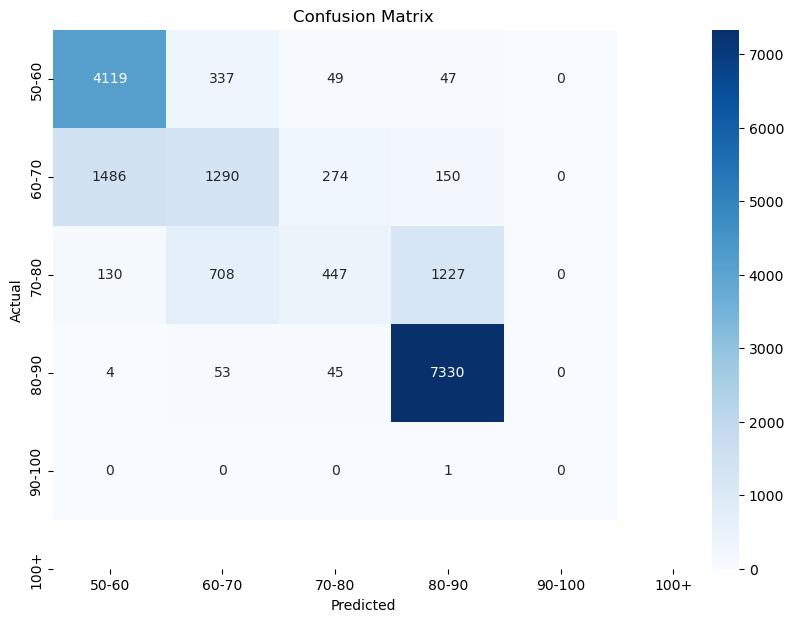

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['50-60', '60-70', '70-80', '80-90', '90-100', '100+']


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Class distribution in y_test: {'50-60': 4552, '60-70': 3200, '70-80': 2512, '80-90': 7432, '90-100': 1}
Binarized labels shape: (17697, 5)
Binarized labels sample: [[0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]
Predicted probabilities shape: (17697, 5)
Predicted probabilities sample: [[1.32393455e-01 4.80321624e-01 2.26549757e-01 1.60683305e-01
  5.18582949e-05]
 [2.25806084e-04 6.99054906e-02 2.41148620e-01 6.88712816e-01
  7.26696215e-06]
 [5.56978424e-01 3.75163496e-01 6.08520156e-02 7.00049638e-03
  5.56864421e-06]
 [2.18928083e-01 4.25501306e-01 3.05900332e-01 4.96158087e-02
  5.44700100e-05]
 [6.94169572e-04 4.88950398e-02 1.62306666e-01 7.88091392e-01
  1.27319106e-05]]


/var/folders/60/ckns09rs19x6z1xwplgdphsh0000gn/T/ipykernel_39850/3013939064.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))


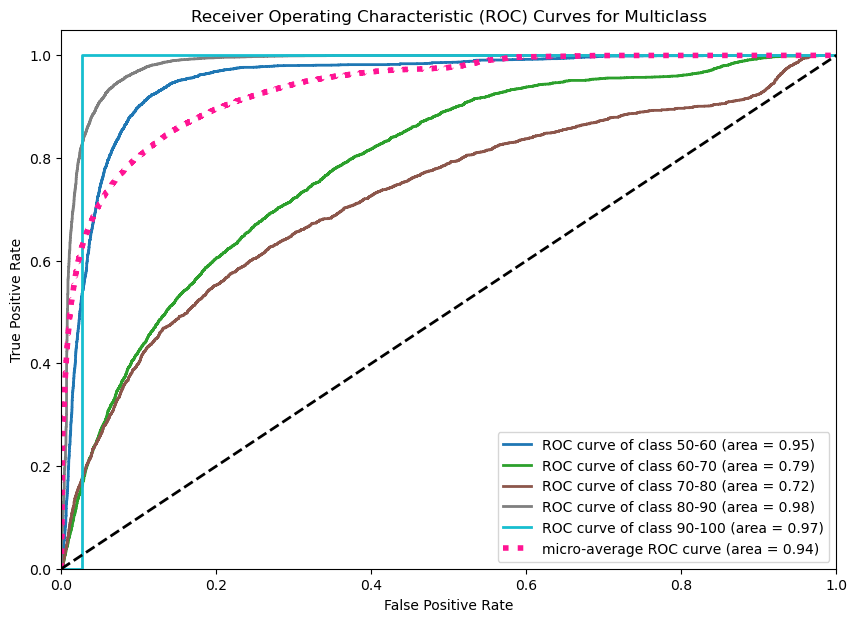

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Check class distribution in test set
unique, counts = np.unique(y_test, return_counts=True)
print("Class distribution in y_test:", dict(zip(unique, counts)))

# Get the unique class labels from y_test
unique_classes = np.unique(y_test)

# Binarize the output using the actual class labels
y_test_binarized = label_binarize(y_test, classes=unique_classes)

# Check binarized labels
print("Binarized labels shape:", y_test_binarized.shape)
print("Binarized labels sample:", y_test_binarized[:5])

# Check predictions
print("Predicted probabilities shape:", y_pred_proba.shape)
print("Predicted probabilities sample:", y_pred_proba[:5])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(unique_classes)):
    if np.sum(y_test_binarized[:, i]) == 0:
        print(f"No positive samples in class {i}")
        continue  # Skip this class if there are no positive samples
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap('tab10', len(unique_classes))

for i, color in zip(range(len(unique_classes)), colors.colors):
    if i in fpr:
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

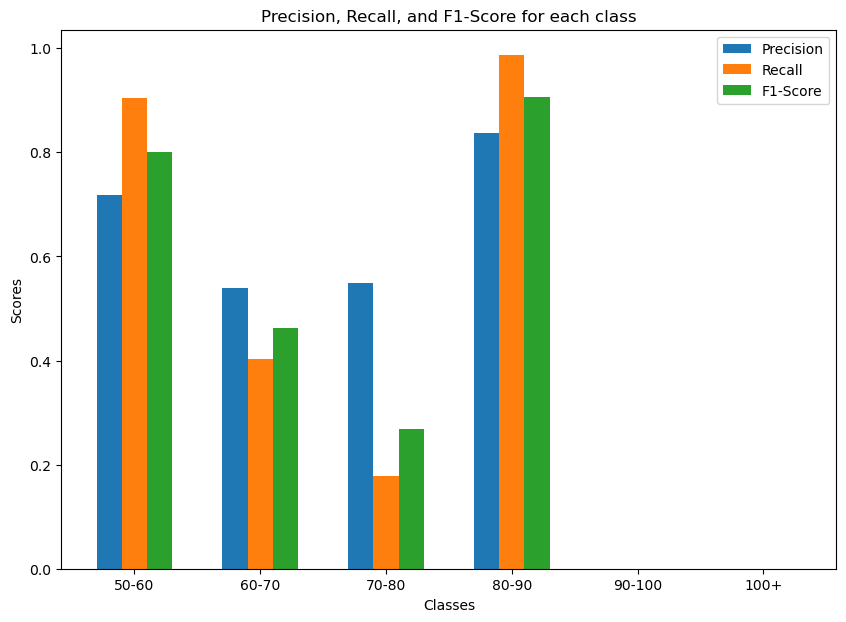

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1-score for all classes
precision = precision_score(y_test, y_pred, labels=class_names, average=None, zero_division=0)
recall = recall_score(y_test, y_pred, labels=class_names, average=None, zero_division=0)
f1 = f1_score(y_test, y_pred, labels=class_names, average=None, zero_division=0)

x = np.arange(len(class_names))

plt.figure(figsize=(10, 7))
plt.bar(x - 0.2, precision, 0.2, label='Precision')
plt.bar(x, recall, 0.2, label='Recall')
plt.bar(x + 0.2, f1, 0.2, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score for each class')
plt.xticks(x, class_names)
plt.legend(loc='best')
plt.show()